## Clean Version of my "Where is Waldo?" Contribution - ACG  

This Notebook intends to create a clean and clearer version of the work done in the previous week

In [43]:
# First, we need to import the relevant packages

# Pillow package to handle images. Mostly to properly save the manipulated images.
from PIL import Image
from PIL import ImageFilter

# Import OpenCV packege. Used mostly for some basic analysis
import cv2

# Import os packages for file management
import os

# Random package is useful to sample and reduce the Non-Waldo set
import random

# From scikit learn we need to properly split our dataset
# as well as to perform Principal Component Analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Other useful and common packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plotting
%matplotlib inline

#### We define some useful functions, namely:
1. A function corner_cut which takes an image, coordinates and lengths, and returns a section of the image. Important Note: Lengths have to be always smaller than the size of the image (Check not implemented).
2. A similar function, center cut. The difference is how the cut is extracted. Center cut uses the coordinates as the center of the image. Corner cut uses the coordinates as the upper left corner.

In [2]:
# corner_cut - Extracts a subimage from an image img, using coords to define the center of the image.

def corner_cut(img, coords, pixh, pixw):
    
    #define frame for the cut
    x = [coords[0], coords[0] + pixw]
    y = [coords[1], coords[1] + pixh]

    #check lower boundaries
    if x[0] < 0: x = [0,pixw]
    if y[0] < 0: y = [0,pixh]

    #check upper boundaries
    if x[1] > img.shape[0]: x = [img.shape[0] - pixw,img.shape[0] - 1]
    if y[1] > img.shape[1]: y = [img.shape[1] - pixh,img.shape[1] - 1]
    
    return img[x[0]:x[1], y[0]:y[1],:]

In [3]:
# center_cut - Extracts a subimage from an image img, using coords to define the upper left corner of the image.

def center_cut(img, coords, pixh, pixw):
    
    #define frame for the cut
    x = [coords[0] - pixw//2, coords[0] + pixw//2]
    y = [coords[1] - pixh//2, coords[1] + pixh//2]

    #check lower boundaries
    if x[0] < 0: x = [0,pixw]
    if y[0] < 0: y = [0,pixh]

    #check upper boundaries
    if x[1] > img.shape[0]: x = [img.shape[0] - pixw,img.shape[0] - 1]
    if y[1] > img.shape[1]: y = [img.shape[1] - pixh,img.shape[1] - 1]

    return img[x[0]:x[1], y[0]:y[1],:]

It should be noted that the coordinates are expected to be written according to the array rules for jpg files. That is, the first entry is a vertical distance from the upper left corner of the image, and the second entry is the horizontal distance.  

Other useful functions:
1. A function Dom_Channel that applies a mask that takes and image and returns a different image where a mask is applied to produce the dominant channel for each pixel.
2. RandShift. Given a coordinate and lengths, returns a randomly shifted around a Manhattan distance of half the image lengths (can be expanded, but there is no clear reason to do that)
3. Redpct. A function that returns the fraction of red dominant channel in a given image. Note, this already includes the function Dom_Channel, so the input image is the original one.

In [4]:
# Dom_Channel - Returns an image with the dominant color channel from a given image
def Dom_Channel(img_org):
    img_dom_Channel = np.argmax(img_org, axis = 2)
    img_dom = np.zeros_like(img_org)
    a,b,_ = img_org.shape
    for i in range(a):
        for j in range(b):
            img_dom[i,j,img_dom_Channel[i,j]] = 255
    return img_dom

In [5]:
def RandShift(coord, pixh, pixw):
    rand_array = np.random.randint(2, size=10)
    y = coord[0] + np.random.randint(pixh//2) - pixh//4
    x = coord[1] + np.random.randint(pixw//2) - pixw//4
    return [y,x]

In [153]:
def Redpct(image):
    a,b,_ = image.shape
    Dom_image = Dom_Channel(image)
    return(np.count_nonzero(Dom_image[:,:,0])/(a*b))

def Greenpct(image):
    a,b,_ = image.shape
    Dom_image = Dom_Channel(image)
    return(np.count_nonzero(Dom_image[:,:,1])/(a*b))

def Bluepct(image):
    a,b,_ = image.shape
    Dom_image = Dom_Channel(image)
    return(np.count_nonzero(Dom_image[:,:,2])/(a*b))

### Red Channel Waldo Testing

Using a small subset of files where the coordinates for Waldo are known, the percentage or red as domminant channel is investigated.

In [7]:
# Note. It might be posible and even desirable to implement a dictionary in order to handle this part
Filenames = ["W1","W7","W13B","W19","W25","W31","W37","W43"]
Wal_coord = [[508, 694], [948, 802], [360, 1250],
            [615, 315], [1490, 2195], [1300, 2520],
            [1515, 445], [48, 1895]]
Walredpct = []
Waldo_train = []
W_coord = []
# Number of samples made from each Waldo
Waldo_Samples = 50

# Directories
#Work_dir = os.getcwd()
#Waldo_dir = "Waldo_set"
#Full_dir = os.path.join(Work_dir, Waldo_dir)


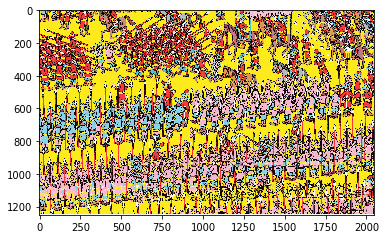

Image W1
Fraction of the Full image 0.8087045988209433
Maximum Fraction of Red Channel 0.806396484375
Minimum Fraction of Red Channel 0.607177734375
Number of elements analyzed 50
<class 'list'> 



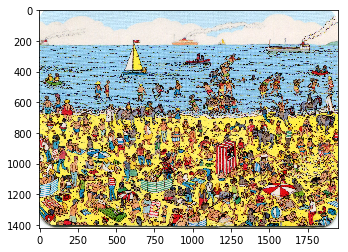

Image W7
Fraction of the Full image 0.5768650987785428
Maximum Fraction of Red Channel 0.876220703125
Minimum Fraction of Red Channel 0.708740234375
Number of elements analyzed 50
<class 'list'> 



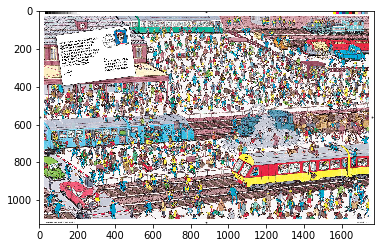

Image W13B
Fraction of the Full image 0.6442254489613446
Maximum Fraction of Red Channel 0.645263671875
Minimum Fraction of Red Channel 0.52978515625
Number of elements analyzed 50
<class 'list'> 



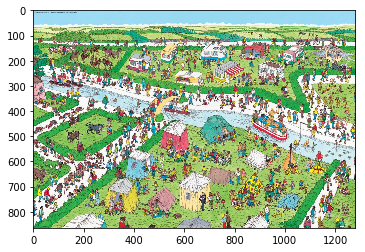

Image W19
Fraction of the Full image 0.29786060474537035
Maximum Fraction of Red Channel 0.32861328125
Minimum Fraction of Red Channel 0.202392578125
Number of elements analyzed 50
<class 'list'> 



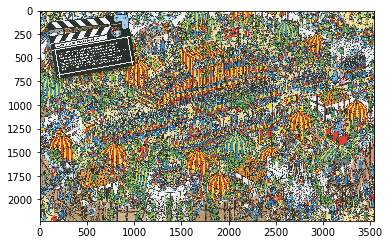

Image W25
Fraction of the Full image 0.49852908069825314
Maximum Fraction of Red Channel 0.750244140625
Minimum Fraction of Red Channel 0.476806640625
Number of elements analyzed 50
<class 'list'> 



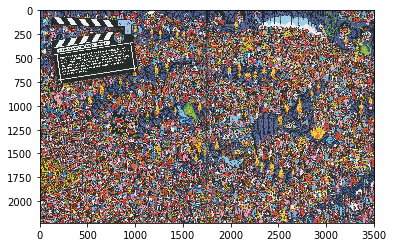

Image W31
Fraction of the Full image 0.4701728886855256
Maximum Fraction of Red Channel 0.782958984375
Minimum Fraction of Red Channel 0.570556640625
Number of elements analyzed 50
<class 'list'> 



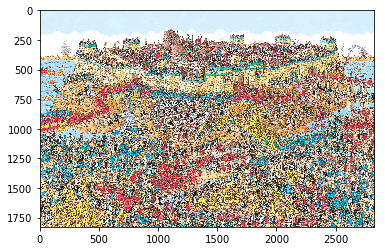

Image W37
Fraction of the Full image 0.660546187081978
Maximum Fraction of Red Channel 0.96484375
Minimum Fraction of Red Channel 0.840087890625
Number of elements analyzed 50
<class 'list'> 



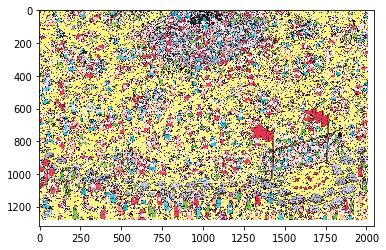

Image W43
Fraction of the Full image 0.823138825991085
Maximum Fraction of Red Channel 0.94189453125
Minimum Fraction of Red Channel 0.7998046875
Number of elements analyzed 50
<class 'list'> 



In [8]:
# Here we make an array of possible Waldo features, as well as the dominant channel and percentage of red in the image
for im in range(len(Filenames)):
    image = plt.imread(Filenames[im] + '.jpg')
    Pct_test = []
    # Ya con el archivo abierto, necesitamos extraer a Waldo y crear copias
    plt.imshow(image)
    plt.show()
    for wi in range(Waldo_Samples):
    
        W_shift = RandShift(Wal_coord[im], 64, 64)
        W_cut = corner_cut(image, W_shift, 64, 64)
        W_red = Dom_Channel(W_cut)
        
        Waldo_train.append(W_cut)
        W_coord.append(W_shift)
        Walredpct.append(Redpct(W_cut))
        Pct_test.append(Redpct(W_cut))

    print("Image " + Filenames[im])
    print("Fraction of the Full image", Redpct(image))
    print("Maximum Fraction of Red Channel", max(Pct_test))
    print("Minimum Fraction of Red Channel", min(Pct_test))
    print("Number of elements analyzed", len(Pct_test))
    print(type(Pct_test),'\n')

What is clear from the previous exercise is that there are two different Waldos that can be found. One is the head, the other one is the body.  
With the previous cell we have now a set of 400 Waldo entries (saved as Waldo_train). We have now to construct the Not Waldo set. Therefore we need to divide the images in a couple of ways.  

NOTE: It might be better to convert to numpy arrays instead of using lists

In [9]:
#pct_np = np.array(Pct_test)
#pct_np.min()

In [10]:
# Here we create the Non-Waldo set. For this we slice twice each of the images, and remove the frames 
# within certain distance from Waldo

# Empty Not Waldo List
NW_train = []
NW_coord = []
h_pix = 64
w_pix = 64

for im in range(len(Filenames)):
    image = plt.imread(Filenames[im] + '.jpg')
    
    # We extract the image size
    size_y, size_x,_ = image.shape
    h_max, w_max = size_y//h_pix + 1, size_x//w_pix + 1
    
    for i in range(h_max):
        for j in range(w_max):
            coords = [i*h_pix, j*w_pix]
            NW_cut = corner_cut(image, coords, h_pix, w_pix)
            Mh_dist = np.abs(coords[0] - Wal_coord[im][0]) + np.abs(coords[1] - Wal_coord[im][1])
            
            if Mh_dist > 64:
                NW_train.append(NW_cut)
                NW_coord.append([coords, Filenames[im]])

            coords = [i*h_pix + h_pix//2, j*w_pix + w_pix//2]
            NW_cut = corner_cut(image, coords, h_pix, w_pix)
            Mh_dist = np.abs(coords[0] - Wal_coord[im][0]) + np.abs(coords[1] - Wal_coord[im][1])
            
            if Mh_dist > 64:
                NW_train.append(NW_cut)
                NW_coord.append([coords, Filenames[im]])
            
# NOTE: Some other shifts can be used to produce a bigger set. Not sure it would be useful

### Now both Waldo and Not Waldo sets are created. 
We can save each set in a given folder, for later inspection.  
It is also possible to try a classification scheme on them immediately.
So, here we save each training set, Waldo and NW into corresponding folders.  
It might be noticed that, as we have pointed out, there are two different Waldos to be found: face, and full. It might be interesting to create classifiers for both cases, which would require us to redo all previous steps for two different sets of Waldos.

In [11]:
# Now, lets save the Waldos
# Directories
Work_dir = os.getcwd()
Waldo_dir = "Waldo_set"
Full_dir = os.path.join(Work_dir, Waldo_dir)

if not os.path.exists(Full_dir):
    os.mkdir(Full_dir)
    
for i,image in enumerate(Waldo_train):
    im_pil = Image.fromarray(image)
    im_pil.save(Full_dir + '\\' + Filenames[i//Waldo_Samples] + '-' + str(i%Waldo_Samples) + '.jpg')

In [12]:
# Now, lets save the Waldos
# Directories
Work_dir = os.getcwd()
Waldo_dir = "NW_set"
Full_dir = os.path.join(Work_dir, Waldo_dir)

if not os.path.exists(Full_dir):
    os.mkdir(Full_dir)
    
for i,image in enumerate(NW_train):
    im_pil = Image.fromarray(image)
    im_pil.save(Full_dir + '\\' + NW_coord[i][1] + '-' + str(NW_coord[i][0][0]) + '-' + str(NW_coord[i][0][1]) + '.jpg')

Up to this point, the dataset has been created and saved. From this point there are two things to do:
1. Investigate statistical features and momenta of each image, from each set
2. Create, as it is, a Dataframe for each file.
3. Once the DataFrame is built, a classification scheme can be attempted  

Let's remember, that the sets are named Waldo_train and NW_train

In [13]:
# Let's flat every image (this is important for constructing a DataFrame, order F is just more natural to jpg files)
W_Flat = []
for im in Waldo_train:
    W_Flat.append(im.flatten('F'))

In [14]:
# Let's flat every image (this is important for constructing a DataFrame, order F is just more natural to jpg files)
NW_Flat = []
for im in NW_train:
    NW_Flat.append(im.flatten('F'))

In [15]:
Waldo_df = pd.DataFrame(W_Flat)
Waldo_df['Waldo'] = 1
Waldo_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,245,241,252,255,251,250,248,255,255,250,...,6,0,3,8,23,7,10,30,1,1
1,255,255,245,255,254,255,252,240,255,245,...,0,0,25,77,29,37,21,39,23,1
2,248,254,252,255,255,229,245,249,255,254,...,126,0,0,131,188,134,146,145,175,1
3,10,165,89,0,14,103,236,223,239,212,...,0,5,0,0,0,0,0,40,0,1
4,249,250,252,252,252,250,255,255,240,255,...,0,0,1,22,0,0,0,12,0,1


In [16]:
# Let's save the DataFrame so we can avoid extra trouble next time
Waldo_df.to_csv('Waldo_df.csv',index=False)

There are way too many possible entries for Non-Waldos, which would require too much memory and too long computing times to create the Full Data set. Lets just better downsize the Non-Waldo entries.  
This can also be partially done by applying the mask obtained from Red Pct.

In [20]:
# Let's reduce the dataset according to the Red Channel percentage (This might not be final)

print(len(NW_Flat))

NW_Redux_Red = []

for i in range(len(NW_Flat)):
        if Redpct(NW_train[i]) > 0.2:
            NW_Redux_Red.append(NW_Flat[i])

print(len(NW_Redux_Red))

16076
14086


In [24]:
# Ok, that was not such a big improvement due to the low threshold
# A higher threshold can be used if we only look for Waldo's face

# This is the size we expect for the Non-Waldo set
NW_Redux_rows = 10*len(W_Flat)
NW_Redux_Flat = random.sample(NW_Flat, NW_Redux_rows)
print(type(NW_Redux_Flat), len(NW_Redux_Flat))

<class 'list'> 4000


While it might be faster to make array operations, it seems there are some non trivial issues when converting to a database

In [26]:
NW_df = pd.DataFrame(NW_Redux_Flat)
NW_df['Waldo'] = 0
NW_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,180,240,255,253,252,254,253,255,252,254,...,0.0,51.0,128.0,236.0,136.0,42.0,86.0,130.0,105.0,0
1,174,206,223,228,154,58,98,198,197,227,...,83.0,41.0,22.0,56.0,76.0,76.0,54.0,59.0,43.0,0
2,239,207,238,172,176,219,222,220,106,51,...,61.0,50.0,51.0,53.0,55.0,56.0,58.0,59.0,60.0,0
3,37,62,80,50,43,94,226,219,226,231,...,205.0,209.0,216.0,218.0,213.0,210.0,213.0,213.0,209.0,0
4,229,232,234,241,247,250,249,241,214,65,...,133.0,136.0,111.0,110.0,105.0,110.0,130.0,126.0,109.0,0


In [27]:
# Let's save the DataFrame so we can avoid extra trouble next time
NW_df.to_csv('NW_df.csv',index=False)

In [28]:
NW_df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,180,240,255,253,252,254,253,255,252,254,...,0.0,51.0,128.0,236.0,136.0,42.0,86.0,130.0,105.0,0
1,174,206,223,228,154,58,98,198,197,227,...,83.0,41.0,22.0,56.0,76.0,76.0,54.0,59.0,43.0,0
2,239,207,238,172,176,219,222,220,106,51,...,61.0,50.0,51.0,53.0,55.0,56.0,58.0,59.0,60.0,0
3,37,62,80,50,43,94,226,219,226,231,...,205.0,209.0,216.0,218.0,213.0,210.0,213.0,213.0,209.0,0
4,229,232,234,241,247,250,249,241,214,65,...,133.0,136.0,111.0,110.0,105.0,110.0,130.0,126.0,109.0,0
5,36,37,34,40,59,81,81,67,81,58,...,78.0,75.0,70.0,69.0,70.0,71.0,69.0,67.0,65.0,0
6,245,242,252,255,240,239,237,255,247,241,...,195.0,196.0,60.0,21.0,198.0,214.0,243.0,221.0,225.0,0
7,172,103,98,79,91,89,57,85,78,125,...,100.0,96.0,124.0,158.0,168.0,171.0,165.0,157.0,175.0,0
8,41,39,61,91,96,90,89,88,83,92,...,75.0,133.0,137.0,143.0,148.0,151.0,151.0,151.0,152.0,0
9,36,28,39,49,38,45,67,71,48,43,...,66.0,79.0,84.0,84.0,77.0,75.0,84.0,93.0,96.0,0


It seems there are some NaN values when the cut goes outside the picture (Can be changed, but probably not at this point). Therefore, it may be better if we just make it black (0,0,0). But first, better make a copy

In [29]:
NW_copy = NW_df.copy()

In [35]:
NW_copy.fillna(0, inplace = True)
NW_copy.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,180,240,255,253,252,254,253,255,252,254,...,0.0,51.0,128.0,236.0,136.0,42.0,86.0,130.0,105.0,0
1,174,206,223,228,154,58,98,198,197,227,...,83.0,41.0,22.0,56.0,76.0,76.0,54.0,59.0,43.0,0
2,239,207,238,172,176,219,222,220,106,51,...,61.0,50.0,51.0,53.0,55.0,56.0,58.0,59.0,60.0,0
3,37,62,80,50,43,94,226,219,226,231,...,205.0,209.0,216.0,218.0,213.0,210.0,213.0,213.0,209.0,0
4,229,232,234,241,247,250,249,241,214,65,...,133.0,136.0,111.0,110.0,105.0,110.0,130.0,126.0,109.0,0


In [37]:
Waldo_copy = Waldo_df.copy()
Waldo_copy.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,245,241,252,255,251,250,248,255,255,250,...,6,0,3,8,23,7,10,30,1,1
1,255,255,245,255,254,255,252,240,255,245,...,0,0,25,77,29,37,21,39,23,1
2,248,254,252,255,255,229,245,249,255,254,...,126,0,0,131,188,134,146,145,175,1
3,10,165,89,0,14,103,236,223,239,212,...,0,5,0,0,0,0,0,40,0,1
4,249,250,252,252,252,250,255,255,240,255,...,0,0,1,22,0,0,0,12,0,1


Having both DataFrames, they should be merged together (concatenated)

In [38]:
Full_data = pd.concat([Waldo_copy,NW_copy])
Full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,245,241,252,255,251,250,248,255,255,250,...,6.0,0.0,3.0,8.0,23.0,7.0,10.0,30.0,1.0,1
1,255,255,245,255,254,255,252,240,255,245,...,0.0,0.0,25.0,77.0,29.0,37.0,21.0,39.0,23.0,1
2,248,254,252,255,255,229,245,249,255,254,...,126.0,0.0,0.0,131.0,188.0,134.0,146.0,145.0,175.0,1
3,10,165,89,0,14,103,236,223,239,212,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,1
4,249,250,252,252,252,250,255,255,240,255,...,0.0,0.0,1.0,22.0,0.0,0.0,0.0,12.0,0.0,1


It seems at some point some of our entries, which are supposed to be ALL integers, were changed to floats

In [42]:
Full_data = Full_data.astype('int32')
Full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Waldo
0,245,241,252,255,251,250,248,255,255,250,...,6,0,3,8,23,7,10,30,1,1
1,255,255,245,255,254,255,252,240,255,245,...,0,0,25,77,29,37,21,39,23,1
2,248,254,252,255,255,229,245,249,255,254,...,126,0,0,131,188,134,146,145,175,1
3,10,165,89,0,14,103,236,223,239,212,...,0,5,0,0,0,0,0,40,0,1
4,249,250,252,252,252,250,255,255,240,255,...,0,0,1,22,0,0,0,12,0,1


### Ok, it seems we finally have a proper dataset (at least according to the PCA-knn approach)

In [62]:
# test train split
X_train,X_test,y_train,y_test = train_test_split(Full_data.iloc[:,:-1],Full_data['Waldo'],
                                                 test_size = .25,random_state = 614,shuffle = True)

In [63]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
3180,251,255,254,253,255,255,254,255,255,255,...,241,238,217,208,198,237,230,122,70,116
3885,145,198,184,197,162,192,211,141,83,132,...,151,154,159,173,168,179,164,177,150,166
955,129,132,142,149,138,122,128,148,143,148,...,174,68,88,205,245,234,231,250,235,243
2407,73,64,54,56,46,46,69,76,89,103,...,89,37,54,89,66,55,119,185,213,223
1481,70,75,92,102,96,83,79,82,92,89,...,109,102,115,110,112,122,123,122,126,123


In [111]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
98,187,168,172,166,181,190,186,174,188,173,...,16,0,22,26,54,49,11,20,0,91
5,255,255,255,255,255,255,255,253,253,253,...,191,225,232,240,233,243,241,203,244,32
949,43,38,43,47,44,47,51,45,40,42,...,53,26,26,18,45,50,54,62,46,39
3840,39,48,46,38,38,39,36,34,40,43,...,34,47,38,45,41,37,44,44,40,44
3625,148,225,221,213,217,206,219,223,245,239,...,221,222,159,69,43,106,130,104,41,0


In [69]:
#type(y_train)
#sum(y_train)
#len(y_train)

OK, now we have reached a point where we can try to apply PCA to the data set

In [82]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

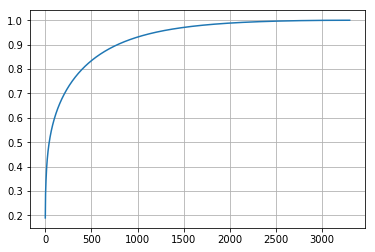

In [83]:
Exp_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(Exp_var.size), Exp_var)
plt.grid()

Cool. Cool, cool, cool. It seems it is working so far

In [116]:
# Lets settle for the time being with 500 components. That is perhaps too much, but lets see
# We make here the pipe for the analysis, here only with 500 channels (just to see what happens)
pca_pipe_n500 = Pipeline([('scaler',StandardScaler()), ('pca',PCA(n_components=500))])
pca_pipe_n500.fit(X_train)

X_pca500_train = pca_pipe_n500.transform(X_train)
X_pca500_test = pca_pipe_n500.transform(X_test)

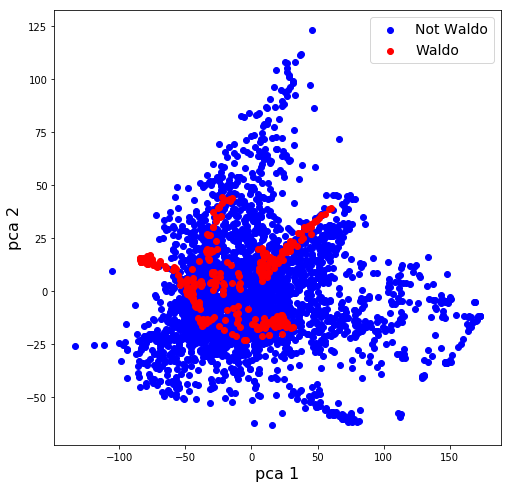

In [117]:
plt.figure(figsize = (8,8))

plt.scatter(X_pca500_train[y_train==0,0],X_pca500_train[y_train==0,1],c='blue',label='Not Waldo')
plt.scatter(X_pca500_train[y_train==1,0],X_pca500_train[y_train==1,1],c='red',label='Waldo')

plt.legend(fontsize=14)
plt.xlabel("pca 1",fontsize=16)
plt.ylabel("pca 2",fontsize=16)

plt.show()

In [118]:
print(type(X_pca500_train),type(X_pca500_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


So, we have found a crucial mistake in Chopain solution... OVERFITTING  
However, we can still pursue the solution path

In [126]:
# Now we can proceed with the Knn algorithm and check results
# The number of K-Neighbors is sampled
# Save a list of Knn fits, Knn predictions of the test set and scores
Knn_fits_u = []
Knn_pred_u = []
Knn_scor_u = []

for i in range(1,11):
    knn_pca_u = KNeighborsClassifier(n_neighbors=i, weights='uniform', n_jobs=-1)
    knn_pca_u.fit(X_pca500_train, y_train)
    Train_score = knn_pca_u.score(X_pca500_train, y_train)
    Test_score = knn_pca_u.score(X_pca500_test, y_test)
    Knn_fits_u.append(knn_pca_u)
    Knn_pred_u.append(knn_pca_u.predict(X_pca500_test))
    Knn_scor_u.append([i, Train_score, Test_score])
    print(i, Train_score, Test_score)


1 1.0 0.9827272727272728
2 0.9848484848484849 0.9645454545454546
3 0.9818181818181818 0.9654545454545455
4 0.9709090909090909 0.9527272727272728
5 0.9709090909090909 0.9518181818181818
6 0.9593939393939394 0.9427272727272727
7 0.9587878787878787 0.9418181818181818
8 0.9466666666666667 0.9390909090909091
9 0.9493939393939393 0.9381818181818182
10 0.9415151515151515 0.9290909090909091


In [127]:
# Now we can proceed with the Knn algorithm and check results
# The number of K-Neighbors is sampled
# Save a list of Knn fits, Knn predictions of the test set and scores
Knn_fits_d = []
Knn_pred_d = []
Knn_scor_d = []

for i in range(1,11):
    knn_pca_d = KNeighborsClassifier(n_neighbors=i, weights='distance', n_jobs=-1)
    knn_pca_d.fit(X_pca500_train, y_train)
    Train_score = knn_pca_d.score(X_pca500_train, y_train)
    Test_score = knn_pca_d.score(X_pca500_test, y_test)
    Knn_fits_d.append(knn_pca_d)
    Knn_pred_d.append(knn_pca_d.predict(X_pca500_test))
    Knn_scor_d.append([i, Train_score, Test_score])
    print(i, Train_score, Test_score)


1 1.0 0.9827272727272728
2 1.0 0.9827272727272728
3 1.0 0.9718181818181818
4 1.0 0.9654545454545455
5 1.0 0.9554545454545454
6 1.0 0.9509090909090909
7 1.0 0.9436363636363636
8 1.0 0.9454545454545454
9 1.0 0.9409090909090909
10 1.0 0.9418181818181818


In [129]:
confusion_matrix(y_test, Knn_pred_d[0])

array([[988,   6],
       [ 13,  93]], dtype=int64)

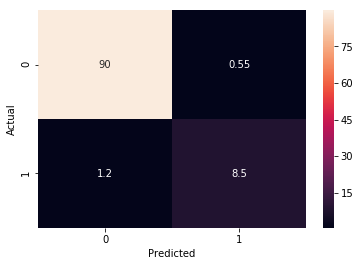

In [138]:
Knn_d1 = {'y_Actual':y_test,'y_Predicted':Knn_pred_d[0]}
Knnd_df = pd.DataFrame(Knn_d1, columns=['y_Actual','y_Predicted'])

cm = pd.crosstab(Knnd_df['y_Actual'], Knnd_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
cm = 100*cm/len(y_test)
sns.heatmap(cm, annot=True)
plt.show()

In [142]:
# Now for the uniform one
confusion_matrix(y_test, Knn_pred_u[2])

array([[987,   7],
       [ 31,  75]], dtype=int64)

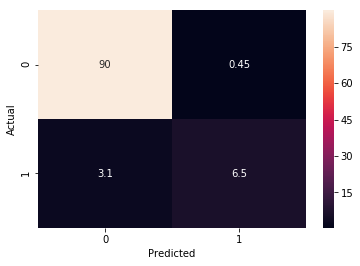

In [143]:
Knn_u2 = {'y_Actual':y_test,'y_Predicted':Knn_pred_u[1]}
Knnu_df = pd.DataFrame(Knn_u2, columns=['y_Actual','y_Predicted'])

cm = pd.crosstab(Knnu_df['y_Actual'], Knnu_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
cm = 100*cm/len(y_test)
sns.heatmap(cm, annot=True)
plt.show()

It appears to be clear that ONE single neighbor does the trick here

Ok, in principle it would be easy to apply other classification methods to the DataFrames. For the moment it would be better to explore other measures for the images

### Image measures and moments

Lets start by calculating the percentages of dominant channels for each channel

In [148]:
#NOTE: It might be better to save Figures using
# plt.imsave("Name", figure_array)

In [166]:
W_Dom_Red_pct = []
W_Dom_Green_pct = []
W_Dom_Blue_pct = []

for image in Waldo_train:
    W_Dom_Red_pct.append(Redpct(image))
    W_Dom_Green_pct.append(Greenpct(image))
    W_Dom_Blue_pct.append(Bluepct(image))

dic = {"Dom_Red_pct":W_Dom_Red_pct, "Dom_Green_pct":W_Dom_Green_pct,"Dom_Blue_pct":W_Dom_Blue_pct}
Waldo_feats_df = pd.DataFrame(data=dic)
Waldo_feats_df.head()

,Dom_Red_pct,Dom_Green_pct,Dom_Blue_pct
0,0.652588,0.093262,0.254150
1,0.764160,0.089355,0.146484
2,0.763672,0.093994,0.142334
3,0.628174,0.093994,0.277832
4,0.792725,0.091797,0.115479


In [165]:
NW_Dom_Red_pct = []
NW_Dom_Green_pct = []
NW_Dom_Blue_pct = []

for image in NW_train:
    NW_Dom_Red_pct.append(Redpct(image))
    NW_Dom_Green_pct.append(Greenpct(image))
    NW_Dom_Blue_pct.append(Bluepct(image))

dic = {"Dom_Red_pct":NW_Dom_Red_pct, "Dom_Green_pct":NW_Dom_Green_pct,"Dom_Blue_pct":NW_Dom_Blue_pct}
NW_feats_df = pd.DataFrame(data=dic)
NW_feats_df.head()

,Dom_Red_pct,Dom_Green_pct,Dom_Blue_pct
0,0.765137,0.053223,0.181641
1,0.972168,0.018555,0.009277
2,0.828125,0.064453,0.107422
3,0.903809,0.068848,0.027344
4,0.864502,0.091064,0.044434


In [286]:
# Lets now use histograms and derived measures
Waldo_moments = []
Waldo_Hu = []

for image in Waldo_train:
    Moments = [cv2.moments(image[:,:,0]),
              cv2.moments(image[:,:,1]),
              cv2.moments(image[:,:,2])]    
    HuMoments = [cv2.HuMoments(Moments[0]),
                 cv2.HuMoments(Moments[1]),
                 cv2.HuMoments(Moments[2])]
    for i in range(0,3):
        temp = HuMoments[i]
        for j in range(0,7):
            temp = HuMoments[i][j]
            HuMoments[i][j] = -np.sign(temp)* np.log10(abs(temp))
    Waldo_moments.append(Moments)
    Waldo_Hu.append(HuMoments)


m00_R_l, m00_G_l, m00_B_l = [],[],[]
m01_R_l, m01_G_l, m01_B_l = [],[],[]
m02_R_l, m02_G_l, m02_B_l = [],[],[]
m03_R_l, m03_G_l, m03_B_l = [],[],[]
m10_R_l, m10_G_l, m10_B_l = [],[],[]
m11_R_l, m11_G_l, m11_B_l = [],[],[]
m12_R_l, m12_G_l, m12_B_l = [],[],[]
m20_R_l, m20_G_l, m20_B_l = [],[],[]
m21_R_l, m21_G_l, m21_B_l = [],[],[]
m30_R_l, m30_G_l, m30_B_l = [],[],[]

mu02_R_l, mu02_G_l, mu02_B_l = [],[],[]
mu03_R_l, mu03_G_l, mu03_B_l = [],[],[]
mu11_R_l, mu11_G_l, mu11_B_l = [],[],[]
mu12_R_l, mu12_G_l, mu12_B_l = [],[],[]
mu20_R_l, mu20_G_l, mu20_B_l = [],[],[]
mu21_R_l, mu21_G_l, mu21_B_l = [],[],[]
mu30_R_l, mu30_G_l, mu30_B_l = [],[],[]

nu02_R_l, nu02_G_l, nu02_B_l = [],[],[]
nu03_R_l, nu03_G_l, nu03_B_l = [],[],[]
nu11_R_l, nu11_G_l, nu11_B_l = [],[],[]
nu12_R_l, nu12_G_l, nu12_B_l = [],[],[]
nu20_R_l, nu20_G_l, nu20_B_l = [],[],[]
nu21_R_l, nu21_G_l, nu21_B_l = [],[],[]
nu30_R_l, nu30_G_l, nu30_B_l = [],[],[]

HuR1_l, HuG1_l, HuB1_l = [],[],[]
HuR2_l, HuG2_l, HuB2_l = [],[],[]
HuR3_l, HuG3_l, HuB3_l = [],[],[]
HuR4_l, HuG4_l, HuB4_l = [],[],[]
HuR5_l, HuG5_l, HuB5_l = [],[],[]
HuR6_l, HuG6_l, HuB6_l = [],[],[]
HuR7_l, HuG7_l, HuB7_l = [],[],[]


for i in range(len(Waldo_moments)):
    m00_R_l.append(Waldo_moments[i][0]['m00'])
    m00_G_l.append(Waldo_moments[i][1]['m00'])
    m00_B_l.append(Waldo_moments[i][2]['m00'])
    m01_R_l.append(Waldo_moments[i][0]['m01'])
    m01_G_l.append(Waldo_moments[i][1]['m01'])
    m01_B_l.append(Waldo_moments[i][2]['m01'])
    m02_R_l.append(Waldo_moments[i][0]['m02'])
    m02_G_l.append(Waldo_moments[i][1]['m02'])
    m02_B_l.append(Waldo_moments[i][2]['m02'])
    m03_R_l.append(Waldo_moments[i][0]['m03'])
    m03_G_l.append(Waldo_moments[i][1]['m03'])
    m03_B_l.append(Waldo_moments[i][2]['m03'])
    m10_R_l.append(Waldo_moments[i][0]['m10'])
    m10_G_l.append(Waldo_moments[i][1]['m10'])
    m10_B_l.append(Waldo_moments[i][2]['m10'])
    m11_R_l.append(Waldo_moments[i][0]['m11'])
    m11_G_l.append(Waldo_moments[i][1]['m11'])
    m11_B_l.append(Waldo_moments[i][2]['m11'])
    m12_R_l.append(Waldo_moments[i][0]['m12'])
    m12_G_l.append(Waldo_moments[i][1]['m12'])
    m12_B_l.append(Waldo_moments[i][2]['m12'])
    m20_R_l.append(Waldo_moments[i][0]['m20'])
    m20_G_l.append(Waldo_moments[i][1]['m20'])
    m20_B_l.append(Waldo_moments[i][2]['m20'])
    m21_R_l.append(Waldo_moments[i][0]['m21'])
    m21_G_l.append(Waldo_moments[i][1]['m21'])
    m21_B_l.append(Waldo_moments[i][2]['m21'])
    m30_R_l.append(Waldo_moments[i][0]['m30'])
    m30_G_l.append(Waldo_moments[i][1]['m30'])
    m30_B_l.append(Waldo_moments[i][2]['m30'])

    mu02_R_l.append(Waldo_moments[i][0]['mu02'])
    mu02_G_l.append(Waldo_moments[i][1]['mu02'])
    mu02_B_l.append(Waldo_moments[i][2]['mu02'])
    mu03_R_l.append(Waldo_moments[i][0]['mu03'])
    mu03_G_l.append(Waldo_moments[i][1]['mu03'])
    mu03_B_l.append(Waldo_moments[i][2]['mu03'])
    mu11_R_l.append(Waldo_moments[i][0]['mu11'])
    mu11_G_l.append(Waldo_moments[i][1]['mu11'])
    mu11_B_l.append(Waldo_moments[i][2]['mu11'])
    mu12_R_l.append(Waldo_moments[i][0]['mu12'])
    mu12_G_l.append(Waldo_moments[i][1]['mu12'])
    mu12_B_l.append(Waldo_moments[i][2]['mu12'])
    mu20_R_l.append(Waldo_moments[i][0]['mu20'])
    mu20_G_l.append(Waldo_moments[i][1]['mu20'])
    mu20_B_l.append(Waldo_moments[i][2]['mu20'])
    mu21_R_l.append(Waldo_moments[i][0]['mu21'])
    mu21_G_l.append(Waldo_moments[i][1]['mu21'])
    mu21_B_l.append(Waldo_moments[i][2]['mu21'])
    mu30_R_l.append(Waldo_moments[i][0]['mu30'])
    mu30_G_l.append(Waldo_moments[i][1]['mu30'])
    mu30_B_l.append(Waldo_moments[i][2]['mu30'])

    nu02_R_l.append(Waldo_moments[i][0]['nu02'])
    nu02_G_l.append(Waldo_moments[i][1]['nu02'])
    nu02_B_l.append(Waldo_moments[i][2]['nu02'])
    nu03_R_l.append(Waldo_moments[i][0]['nu03'])
    nu03_G_l.append(Waldo_moments[i][1]['nu03'])
    nu03_B_l.append(Waldo_moments[i][2]['nu03'])
    nu11_R_l.append(Waldo_moments[i][0]['nu11'])
    nu11_G_l.append(Waldo_moments[i][1]['nu11'])
    nu11_B_l.append(Waldo_moments[i][2]['nu11'])
    nu12_R_l.append(Waldo_moments[i][0]['nu12'])
    nu12_G_l.append(Waldo_moments[i][1]['nu12'])
    nu12_B_l.append(Waldo_moments[i][2]['nu12'])
    nu20_R_l.append(Waldo_moments[i][0]['nu20'])
    nu20_G_l.append(Waldo_moments[i][1]['nu20'])
    nu20_B_l.append(Waldo_moments[i][2]['nu20'])
    nu21_R_l.append(Waldo_moments[i][0]['nu21'])
    nu21_G_l.append(Waldo_moments[i][1]['nu21'])
    nu21_B_l.append(Waldo_moments[i][2]['nu21'])
    nu30_R_l.append(Waldo_moments[i][0]['nu30'])
    nu30_G_l.append(Waldo_moments[i][1]['nu30'])
    nu30_B_l.append(Waldo_moments[i][2]['nu30'])

    HuR1_l.append(Waldo_Hu[i][0][0][0])
    HuG1_l.append(Waldo_Hu[i][1][0][0])
    HuB1_l.append(Waldo_Hu[i][2][0][0])
    HuR2_l.append(Waldo_Hu[i][0][1][0])
    HuG2_l.append(Waldo_Hu[i][1][1][0])
    HuB2_l.append(Waldo_Hu[i][2][1][0])
    HuR3_l.append(Waldo_Hu[i][0][2][0])
    HuG3_l.append(Waldo_Hu[i][1][2][0])
    HuB3_l.append(Waldo_Hu[i][2][2][0])
    HuR4_l.append(Waldo_Hu[i][0][3][0])
    HuG4_l.append(Waldo_Hu[i][1][3][0])
    HuB4_l.append(Waldo_Hu[i][2][3][0])
    HuR5_l.append(Waldo_Hu[i][0][4][0])
    HuG5_l.append(Waldo_Hu[i][1][4][0])
    HuB5_l.append(Waldo_Hu[i][2][4][0])
    HuR6_l.append(Waldo_Hu[i][0][5][0])
    HuG6_l.append(Waldo_Hu[i][1][5][0])
    HuB6_l.append(Waldo_Hu[i][2][5][0])
    HuR7_l.append(Waldo_Hu[i][0][6][0])
    HuG7_l.append(Waldo_Hu[i][1][6][0])
    HuB7_l.append(Waldo_Hu[i][2][6][0])



dic = {'m00_R':m00_R_l, 'm00_G':m00_G_l, 'm00_B':m00_B_l,
       'm01_R':m01_R_l, 'm01_G':m01_G_l, 'm01_B':m01_B_l,
       'm02_R':m02_R_l, 'm02_G':m02_G_l, 'm02_B':m02_B_l,
       'm03_R':m03_R_l, 'm03_G':m03_G_l, 'm03_B':m03_B_l,
       'm10_R':m10_R_l, 'm10_G':m10_G_l, 'm10_B':m10_B_l,
       'm11_R':m11_R_l, 'm11_G':m11_G_l, 'm11_B':m11_B_l,
       'm12_R':m12_R_l, 'm12_G':m12_G_l, 'm12_B':m12_B_l,
       'm20_R':m20_R_l, 'm20_G':m20_G_l, 'm20_B':m20_B_l,
       'm21_R':m21_R_l, 'm21_G':m21_G_l, 'm21_B':m21_B_l,
       'm30_R':m30_R_l, 'm30_G':m30_G_l, 'm30_B':m30_B_l,       
       'mu02_R':mu02_R_l, 'mu02_G':mu02_G_l, 'mu02_B':mu02_B_l,
       'mu03_R':mu03_R_l, 'mu03_G':mu03_G_l, 'mu03_B':mu03_B_l,
       'mu11_R':mu11_R_l, 'mu11_G':mu11_G_l, 'mu11_B':mu11_B_l,
       'mu12_R':mu12_R_l, 'mu12_G':mu12_G_l, 'mu12_B':mu12_B_l,
       'mu20_R':mu20_R_l, 'mu20_G':mu20_G_l, 'mu20_B':mu20_B_l,
       'mu21_R':mu21_R_l, 'mu21_G':mu21_G_l, 'mu21_B':mu21_B_l,       
       'mu30_R':mu30_R_l, 'mu30_G':mu30_G_l, 'mu30_B':mu30_B_l,
       'nu02_R':nu02_R_l, 'nu02_G':nu02_G_l, 'nu02_B':nu02_B_l,
       'nu03_R':nu03_R_l, 'nu03_G':nu03_G_l, 'nu03_B':nu03_B_l,
       'nu11_R':nu11_R_l, 'nu11_G':nu11_G_l, 'nu11_B':nu11_B_l,
       'nu12_R':nu12_R_l, 'nu12_G':nu12_G_l, 'nu12_B':nu12_B_l,
       'nu20_R':nu20_R_l, 'nu20_G':nu20_G_l, 'nu20_B':nu20_B_l,
       'nu21_R':nu21_R_l, 'nu21_G':nu21_G_l, 'nu21_B':nu21_B_l,       
       'nu30_R':nu30_R_l, 'nu30_G':nu30_G_l, 'nu30_B':nu30_B_l,
       'Hu_R1':HuR1_l, 'Hu_G1':HuG1_l, 'Hu_B1':HuB1_l,
       'Hu_R2':HuR2_l, 'Hu_G2':HuG2_l, 'Hu_B2':HuB2_l,
       'Hu_R3':HuR3_l, 'Hu_G3':HuG3_l, 'Hu_B3':HuB3_l,
       'Hu_R4':HuR4_l, 'Hu_G4':HuG4_l, 'Hu_B4':HuB4_l,
       'Hu_R5':HuR5_l, 'Hu_G5':HuG5_l, 'Hu_B5':HuB5_l,
       'Hu_R6':HuR6_l, 'Hu_G6':HuG6_l, 'Hu_B6':HuB6_l,
       'Hu_R7':HuR7_l, 'Hu_G7':HuG7_l, 'Hu_B7':HuB7_l,
       }


Waldo_moments_df = pd.DataFrame(data=dic)
Waldo_moments_df.head()

,m00_R,m00_G,m00_B,m01_R,m01_G,m01_B,m02_R,m02_G,m02_B,m03_R,...,Hu_B4,Hu_R5,Hu_G5,Hu_B5,Hu_R6,Hu_G6,Hu_B6,Hu_R7,Hu_G7,Hu_B7
0,562776.0,461394.0,382607.0,18138800.0,15424857.0,13639027.0,775775802.0,677082273.0,618883295.0,3.701347e+10,...,10.342036,22.617380,-21.236835,-20.600932,15.415605,15.440725,-14.461375,21.872239,-21.516259,-21.230398
1,688026.0,588902.0,265397.0,19546113.0,16848042.0,10006205.0,805598451.0,699274538.0,458527775.0,3.836533e+10,...,8.738432,22.145790,-21.969407,17.666240,15.290115,14.521951,12.031884,21.987390,21.657544,-18.477025
2,651908.0,551485.0,277243.0,19102730.0,16195169.0,9899127.0,806092576.0,681050005.0,430645187.0,3.869725e+10,...,8.986413,-23.706359,22.631614,18.093360,-15.243697,14.856095,12.470137,22.748738,22.177143,18.898381
3,563067.0,503787.0,392931.0,17974219.0,16710993.0,14066108.0,758159727.0,723354485.0,641071258.0,3.586437e+10,...,10.098239,21.635716,-21.525226,-20.293246,-15.178666,15.116494,-14.008210,22.283056,-21.614498,-20.231106
4,673054.0,543029.0,262571.0,19869665.0,15594103.0,9062231.0,835994465.0,651516061.0,397979875.0,4.004752e+10,...,9.225044,-23.172704,23.388984,19.549486,-15.920614,16.073709,12.430984,23.097669,-22.253178,18.416339


In [289]:
# OK. Now lets do the same awful thing for the Not Waldo set
NW_moments = []
NW_Hu = []

for image in NW_train:
    Moments = [cv2.moments(image[:,:,0]),
              cv2.moments(image[:,:,1]),
              cv2.moments(image[:,:,2])]    
    HuMoments = [cv2.HuMoments(Moments[0]),
                 cv2.HuMoments(Moments[1]),
                 cv2.HuMoments(Moments[2])]
    for i in range(0,3):
        temp = HuMoments[i]
        for j in range(0,7):
            temp = HuMoments[i][j]
            HuMoments[i][j] = -np.sign(temp)* np.log10(abs(temp))
    NW_moments.append(Moments)
    NW_Hu.append(HuMoments)


m00_R_l, m00_G_l, m00_B_l = [],[],[]
m01_R_l, m01_G_l, m01_B_l = [],[],[]
m02_R_l, m02_G_l, m02_B_l = [],[],[]
m03_R_l, m03_G_l, m03_B_l = [],[],[]
m10_R_l, m10_G_l, m10_B_l = [],[],[]
m11_R_l, m11_G_l, m11_B_l = [],[],[]
m12_R_l, m12_G_l, m12_B_l = [],[],[]
m20_R_l, m20_G_l, m20_B_l = [],[],[]
m21_R_l, m21_G_l, m21_B_l = [],[],[]
m30_R_l, m30_G_l, m30_B_l = [],[],[]

mu02_R_l, mu02_G_l, mu02_B_l = [],[],[]
mu03_R_l, mu03_G_l, mu03_B_l = [],[],[]
mu11_R_l, mu11_G_l, mu11_B_l = [],[],[]
mu12_R_l, mu12_G_l, mu12_B_l = [],[],[]
mu20_R_l, mu20_G_l, mu20_B_l = [],[],[]
mu21_R_l, mu21_G_l, mu21_B_l = [],[],[]
mu30_R_l, mu30_G_l, mu30_B_l = [],[],[]

nu02_R_l, nu02_G_l, nu02_B_l = [],[],[]
nu03_R_l, nu03_G_l, nu03_B_l = [],[],[]
nu11_R_l, nu11_G_l, nu11_B_l = [],[],[]
nu12_R_l, nu12_G_l, nu12_B_l = [],[],[]
nu20_R_l, nu20_G_l, nu20_B_l = [],[],[]
nu21_R_l, nu21_G_l, nu21_B_l = [],[],[]
nu30_R_l, nu30_G_l, nu30_B_l = [],[],[]

HuR1_l, HuG1_l, HuB1_l = [],[],[]
HuR2_l, HuG2_l, HuB2_l = [],[],[]
HuR3_l, HuG3_l, HuB3_l = [],[],[]
HuR4_l, HuG4_l, HuB4_l = [],[],[]
HuR5_l, HuG5_l, HuB5_l = [],[],[]
HuR6_l, HuG6_l, HuB6_l = [],[],[]
HuR7_l, HuG7_l, HuB7_l = [],[],[]


for i in range(len(NW_moments)):
    m00_R_l.append(NW_moments[i][0]['m00'])
    m00_G_l.append(NW_moments[i][1]['m00'])
    m00_B_l.append(NW_moments[i][2]['m00'])
    m01_R_l.append(NW_moments[i][0]['m01'])
    m01_G_l.append(NW_moments[i][1]['m01'])
    m01_B_l.append(NW_moments[i][2]['m01'])
    m02_R_l.append(NW_moments[i][0]['m02'])
    m02_G_l.append(NW_moments[i][1]['m02'])
    m02_B_l.append(NW_moments[i][2]['m02'])
    m03_R_l.append(NW_moments[i][0]['m03'])
    m03_G_l.append(NW_moments[i][1]['m03'])
    m03_B_l.append(NW_moments[i][2]['m03'])
    m10_R_l.append(NW_moments[i][0]['m10'])
    m10_G_l.append(NW_moments[i][1]['m10'])
    m10_B_l.append(NW_moments[i][2]['m10'])
    m11_R_l.append(NW_moments[i][0]['m11'])
    m11_G_l.append(NW_moments[i][1]['m11'])
    m11_B_l.append(NW_moments[i][2]['m11'])
    m12_R_l.append(NW_moments[i][0]['m12'])
    m12_G_l.append(NW_moments[i][1]['m12'])
    m12_B_l.append(NW_moments[i][2]['m12'])
    m20_R_l.append(NW_moments[i][0]['m20'])
    m20_G_l.append(NW_moments[i][1]['m20'])
    m20_B_l.append(NW_moments[i][2]['m20'])
    m21_R_l.append(NW_moments[i][0]['m21'])
    m21_G_l.append(NW_moments[i][1]['m21'])
    m21_B_l.append(NW_moments[i][2]['m21'])
    m30_R_l.append(NW_moments[i][0]['m30'])
    m30_G_l.append(NW_moments[i][1]['m30'])
    m30_B_l.append(NW_moments[i][2]['m30'])

    mu02_R_l.append(NW_moments[i][0]['mu02'])
    mu02_G_l.append(NW_moments[i][1]['mu02'])
    mu02_B_l.append(NW_moments[i][2]['mu02'])
    mu03_R_l.append(NW_moments[i][0]['mu03'])
    mu03_G_l.append(NW_moments[i][1]['mu03'])
    mu03_B_l.append(NW_moments[i][2]['mu03'])
    mu11_R_l.append(NW_moments[i][0]['mu11'])
    mu11_G_l.append(NW_moments[i][1]['mu11'])
    mu11_B_l.append(NW_moments[i][2]['mu11'])
    mu12_R_l.append(NW_moments[i][0]['mu12'])
    mu12_G_l.append(NW_moments[i][1]['mu12'])
    mu12_B_l.append(NW_moments[i][2]['mu12'])
    mu20_R_l.append(NW_moments[i][0]['mu20'])
    mu20_G_l.append(NW_moments[i][1]['mu20'])
    mu20_B_l.append(NW_moments[i][2]['mu20'])
    mu21_R_l.append(NW_moments[i][0]['mu21'])
    mu21_G_l.append(NW_moments[i][1]['mu21'])
    mu21_B_l.append(NW_moments[i][2]['mu21'])
    mu30_R_l.append(NW_moments[i][0]['mu30'])
    mu30_G_l.append(NW_moments[i][1]['mu30'])
    mu30_B_l.append(NW_moments[i][2]['mu30'])

    nu02_R_l.append(NW_moments[i][0]['nu02'])
    nu02_G_l.append(NW_moments[i][1]['nu02'])
    nu02_B_l.append(NW_moments[i][2]['nu02'])
    nu03_R_l.append(NW_moments[i][0]['nu03'])
    nu03_G_l.append(NW_moments[i][1]['nu03'])
    nu03_B_l.append(NW_moments[i][2]['nu03'])
    nu11_R_l.append(NW_moments[i][0]['nu11'])
    nu11_G_l.append(NW_moments[i][1]['nu11'])
    nu11_B_l.append(NW_moments[i][2]['nu11'])
    nu12_R_l.append(NW_moments[i][0]['nu12'])
    nu12_G_l.append(NW_moments[i][1]['nu12'])
    nu12_B_l.append(NW_moments[i][2]['nu12'])
    nu20_R_l.append(NW_moments[i][0]['nu20'])
    nu20_G_l.append(NW_moments[i][1]['nu20'])
    nu20_B_l.append(NW_moments[i][2]['nu20'])
    nu21_R_l.append(NW_moments[i][0]['nu21'])
    nu21_G_l.append(NW_moments[i][1]['nu21'])
    nu21_B_l.append(NW_moments[i][2]['nu21'])
    nu30_R_l.append(NW_moments[i][0]['nu30'])
    nu30_G_l.append(NW_moments[i][1]['nu30'])
    nu30_B_l.append(NW_moments[i][2]['nu30'])

    HuR1_l.append(NW_Hu[i][0][0][0])
    HuG1_l.append(NW_Hu[i][1][0][0])
    HuB1_l.append(NW_Hu[i][2][0][0])
    HuR2_l.append(NW_Hu[i][0][1][0])
    HuG2_l.append(NW_Hu[i][1][1][0])
    HuB2_l.append(NW_Hu[i][2][1][0])
    HuR3_l.append(NW_Hu[i][0][2][0])
    HuG3_l.append(NW_Hu[i][1][2][0])
    HuB3_l.append(NW_Hu[i][2][2][0])
    HuR4_l.append(NW_Hu[i][0][3][0])
    HuG4_l.append(NW_Hu[i][1][3][0])
    HuB4_l.append(NW_Hu[i][2][3][0])
    HuR5_l.append(NW_Hu[i][0][4][0])
    HuG5_l.append(NW_Hu[i][1][4][0])
    HuB5_l.append(NW_Hu[i][2][4][0])
    HuR6_l.append(NW_Hu[i][0][5][0])
    HuG6_l.append(NW_Hu[i][1][5][0])
    HuB6_l.append(NW_Hu[i][2][5][0])
    HuR7_l.append(NW_Hu[i][0][6][0])
    HuG7_l.append(NW_Hu[i][1][6][0])
    HuB7_l.append(NW_Hu[i][2][6][0])



dic = {'m00_R':m00_R_l, 'm00_G':m00_G_l, 'm00_B':m00_B_l,
       'm01_R':m01_R_l, 'm01_G':m01_G_l, 'm01_B':m01_B_l,
       'm02_R':m02_R_l, 'm02_G':m02_G_l, 'm02_B':m02_B_l,
       'm03_R':m03_R_l, 'm03_G':m03_G_l, 'm03_B':m03_B_l,
       'm10_R':m10_R_l, 'm10_G':m10_G_l, 'm10_B':m10_B_l,
       'm11_R':m11_R_l, 'm11_G':m11_G_l, 'm11_B':m11_B_l,
       'm12_R':m12_R_l, 'm12_G':m12_G_l, 'm12_B':m12_B_l,
       'm20_R':m20_R_l, 'm20_G':m20_G_l, 'm20_B':m20_B_l,
       'm21_R':m21_R_l, 'm21_G':m21_G_l, 'm21_B':m21_B_l,
       'm30_R':m30_R_l, 'm30_G':m30_G_l, 'm30_B':m30_B_l,       
       'mu02_R':mu02_R_l, 'mu02_G':mu02_G_l, 'mu02_B':mu02_B_l,
       'mu03_R':mu03_R_l, 'mu03_G':mu03_G_l, 'mu03_B':mu03_B_l,
       'mu11_R':mu11_R_l, 'mu11_G':mu11_G_l, 'mu11_B':mu11_B_l,
       'mu12_R':mu12_R_l, 'mu12_G':mu12_G_l, 'mu12_B':mu12_B_l,
       'mu20_R':mu20_R_l, 'mu20_G':mu20_G_l, 'mu20_B':mu20_B_l,
       'mu21_R':mu21_R_l, 'mu21_G':mu21_G_l, 'mu21_B':mu21_B_l,       
       'mu30_R':mu30_R_l, 'mu30_G':mu30_G_l, 'mu30_B':mu30_B_l,
       'nu02_R':nu02_R_l, 'nu02_G':nu02_G_l, 'nu02_B':nu02_B_l,
       'nu03_R':nu03_R_l, 'nu03_G':nu03_G_l, 'nu03_B':nu03_B_l,
       'nu11_R':nu11_R_l, 'nu11_G':nu11_G_l, 'nu11_B':nu11_B_l,
       'nu12_R':nu12_R_l, 'nu12_G':nu12_G_l, 'nu12_B':nu12_B_l,
       'nu20_R':nu20_R_l, 'nu20_G':nu20_G_l, 'nu20_B':nu20_B_l,
       'nu21_R':nu21_R_l, 'nu21_G':nu21_G_l, 'nu21_B':nu21_B_l,       
       'nu30_R':nu30_R_l, 'nu30_G':nu30_G_l, 'nu30_B':nu30_B_l,
       'Hu_R1':HuR1_l, 'Hu_G1':HuG1_l, 'Hu_B1':HuB1_l,
       'Hu_R2':HuR2_l, 'Hu_G2':HuG2_l, 'Hu_B2':HuB2_l,
       'Hu_R3':HuR3_l, 'Hu_G3':HuG3_l, 'Hu_B3':HuB3_l,
       'Hu_R4':HuR4_l, 'Hu_G4':HuG4_l, 'Hu_B4':HuB4_l,
       'Hu_R5':HuR5_l, 'Hu_G5':HuG5_l, 'Hu_B5':HuB5_l,
       'Hu_R6':HuR6_l, 'Hu_G6':HuG6_l, 'Hu_B6':HuB6_l,
       'Hu_R7':HuR7_l, 'Hu_G7':HuG7_l, 'Hu_B7':HuB7_l,
       }


NW_moments_df = pd.DataFrame(data=dic)
NW_moments_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


,m00_R,m00_G,m00_B,m01_R,m01_G,m01_B,m02_R,m02_G,m02_B,m03_R,...,Hu_B4,Hu_R5,Hu_G5,Hu_B5,Hu_R6,Hu_G6,Hu_B6,Hu_R7,Hu_G7,Hu_B7
0,692150.0,583675.0,351940.0,22792499.0,18088957.0,9977743.0,9.683725e+08,7.396410e+08,386964329.0,4.561944e+10,...,10.233882,-23.553431,21.572832,20.711240,-15.831081,15.257543,13.832656,-23.420924,-22.366157,24.022116
1,864649.0,734961.0,211545.0,29443665.0,26074936.0,4923711.0,1.306218e+09,1.179932e+09,178001253.0,6.388642e+10,...,9.241928,22.993015,21.921479,18.080319,16.108344,15.570594,-12.437057,23.527096,21.892404,-19.297260
2,651271.0,533801.0,305468.0,20014854.0,16696418.0,9501835.0,8.404970e+08,7.019284e+08,399696191.0,3.999108e+10,...,10.833863,-23.362082,21.144628,22.036980,-15.632709,-15.092482,-14.379768,-22.707335,-21.121001,21.820628
3,714145.0,543957.0,216753.0,24565013.0,20559917.0,6139269.0,1.085976e+09,9.464286e+08,248357619.0,5.299589e+10,...,9.353445,22.694105,-20.407300,18.611530,14.970170,14.005905,12.655948,-22.574441,-20.670597,20.320234
4,726607.0,385889.0,224931.0,23890760.0,10618924.0,6828304.0,1.034681e+09,4.161761e+08,283595748.0,4.995947e+10,...,9.383923,24.156493,20.215773,19.599722,16.899424,14.490454,12.973249,-24.406410,20.703021,19.080023


### FINALLY!!!! Now we can do PCA and KNN on this new data set
For this we should join the different dataframes that have been created. 